<a href="https://colab.research.google.com/github/tamiresco/Spike-Timing/blob/master/Timing_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introdução

* Feature Selection: teste de hipotese em cada feature
* Modelo: Com os atributos das distribuições da sessao 1 e 2(?) preveremos quando a porcentagem de acerto dos ratos na sessao 7(?)

Envirolment setting up

In [19]:
# basicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import dask as dask
from scipy import stats

# google colab
from google.colab import files

# feature selection
!pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error

# model
import xgboost as xgb

Opening file

In [20]:
dataFrame3 = pd.read_csv('dataFrame3.csv')#, index_col=['rat'])#.drop(columns=['rat'])
y_append = pd.read_csv('y_append.cvs')#, index_col=['rat'])#.drop(columns=['rat','session'])

### Preprocessing

In [21]:
scaler = StandardScaler()

In [22]:
y_append.drop(index=[57,58], inplace=True)
y_append.drop(columns=['session', 'rat'], inplace=True)

scaler.fit(y)
y = scaler.transform(y)

y = pd.DataFrame(y).apply(lambda x: 100*round(x,2)).astype('int32')
y = np.array(y)

In [23]:
dataFrame3.drop(index=[15,16,17,18,19], inplace=True)
dataFrame3.reset_index(inplace=True)
dataFrame3.drop(columns=['index', 'rat'], inplace=True)

scaler.fit(X)
X = scaler.transform(X)

X = pd.DataFrame(X).applymap(lambda x: 100*round(x,2)).astype('int32') #multiplicando por 100, arredondando e definindo como inteiro: 0.453 = 45 
X = np.array(X) #transformando em np array pq o boruta pede isso

### Feature Selection

In [ ]:
#Iniciando funcoes 
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight= 'balanced_subsample' , max_depth=10) 
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1, max_iter = 50, perc = 90) #TO DO entender melhor 

#aplicando-as aos dados
boruta_selector.fit(X, y)

#colunas aprovadas
# X.columns[boruta.support_]
# X.columns[boruta.upport_weak_]

#Novo X
# X = X.columns[boruta.support_]

### Model

Treino

In [9]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# treinando regressor
xgbr = xgb.XGBRegressor(verbosity=0)  # (?) (n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgbr.fit(X_train, y_train) # (?) (X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False) 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 

Training score:  0.9949422884411839


Validação 
*   *The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).*

In [21]:
# cross validataion com cv = 5 e cv = Kfold (para comparar)
scores = cross_val_score(xgbr, X_train, y_train, cv=5, scoring = "neg_mean_absolute_error")
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold , scoring = "neg_mean_absolute_error")
print("Kfold CV average score: %.2f" % kf_cv_scores.mean())

array([ -9.38846741, -11.011203  , -11.81577225,  -4.84244995,
        -6.03832092, -10.94163742,  -7.91245346, -12.78656616,
        -8.05264091,  -9.91033554])

Teste

r2: -0.13
r2: -0.06


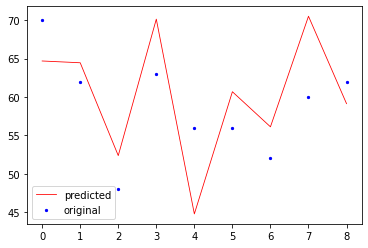

In [17]:
# testando regressor
y_pred = xgbr.predict(X_test) # (?) nao deveria fazer com um X_valid ate eu ter certeza q é a ultima alteracao q estou fazendo no modelo
r2 = r2_score(y_test, y_pred)
print("r2: %.2f" % r2)
print("r2: %.2f" % (r2*(1/2.0)))

# graficos
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Rascunho

In [ ]:
  # def cross_validation (model, X, y, cv=5, n_jobs=4, scoring='r2'):

#   X, X_week = boruta(X, y)
#   score = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring)

#   print("Individuals scores: ", scores())
#   print("Average scores: ", scores.mean())